<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-数据加载与查看" data-toc-modified-id="1.-数据加载与查看-1">1. 数据加载与查看</a></span><ul class="toc-item"><li><span><a href="#1.1-查看图的节点" data-toc-modified-id="1.1-查看图的节点-1.1">1.1 查看图的节点</a></span></li><li><span><a href="#1.2-查看图的边" data-toc-modified-id="1.2-查看图的边-1.2">1.2 查看图的边</a></span></li><li><span><a href="#1.3-查看节点的度" data-toc-modified-id="1.3-查看节点的度-1.3">1.3 查看节点的度</a></span></li></ul></li><li><span><a href="#2.-Graph-Embedding" data-toc-modified-id="2.-Graph-Embedding-2">2. Graph Embedding</a></span><ul class="toc-item"><li><span><a href="#2.1-图特征拉普拉斯算子" data-toc-modified-id="2.1-图特征拉普拉斯算子-2.1">2.1 图特征拉普拉斯算子</a></span></li><li><span><a href="#2.2-Embedding" data-toc-modified-id="2.2-Embedding-2.2">2.2 Embedding</a></span></li></ul></li><li><span><a href="#3.-PCA降维与可视化" data-toc-modified-id="3.-PCA降维与可视化-3">3. PCA降维与可视化</a></span></li></ul></div>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from functools import reduce

## 1. 数据加载与查看

https://www.osgeo.cn/networkx/reference/readwrite/gml.html

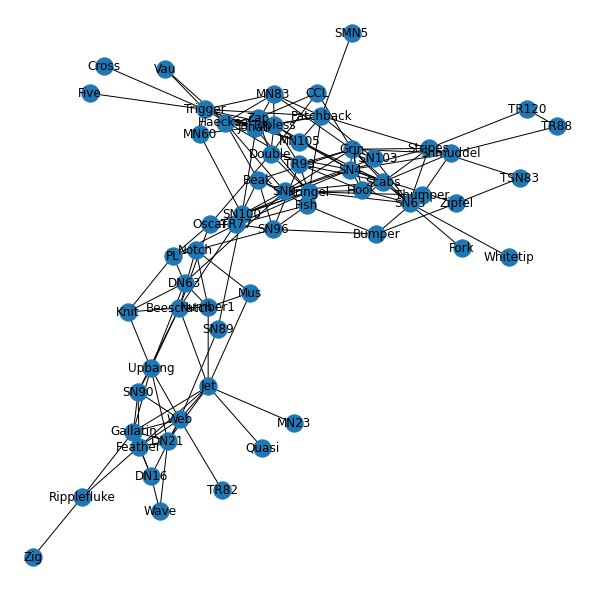

In [2]:
G = nx.read_gml('./dolphins.gml')
plt.figure(figsize=(8,8))
nx.draw_spring(G, with_labels=True)
plt.show()
# 每一次plt.show()D的图像都不一样

### 1.1 查看图的节点

In [3]:
print(list(G.nodes)[0:4]) # 节点表示海豚的名字
print(len(list(G.nodes))) # 结点数量

['Beak', 'Beescratch', 'Bumper', 'CCL']
62


### 1.2 查看图的边

In [4]:
print(list(G.edges)[0:4]) # 边表示两只海豚之间的信息
print(len(list(G.edges))) # 边的数量

[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9')]
159


### 1.3 查看节点的度

In [5]:
print(list(G.degree)[0:4])

[('Beak', 6), ('Beescratch', 8), ('Bumper', 4), ('CCL', 3)]


## 2. Graph Embedding
### 2.1 图特征拉普拉斯算子

In [6]:
# 节点名到编号映射
node_to_idx = {node: idx for idx, node in enumerate(G.nodes)}
edges = [(node_to_idx[x], node_to_idx[y]) for x, y in G.edges]

# 以节点数量为维度构建单位矩阵I
I = np.identity(len(G.nodes))

# 邻接矩阵A，有边的地方赋值为1
A = np.zeros(shape=(len(G.nodes), len(G.nodes)))
for edge in edges:
    A[edge] = 1
A = A + I
    
# 度矩阵D
D = I * A.sum(axis=1)

# 拉普拉斯图算子 采用 Symmetric normalized Laplacian 归一化
D_sqrt = I * 1/np.sqrt(D.sum(axis=1))
L_sys = reduce(np.dot, [D_sqrt, A, D_sqrt])
# reduce?

In [7]:
A[0] # 邻接矩阵的第一行，有值的地方表示有边/连接

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
D[0] # 度矩阵的第一行，度矩阵只在对角线有值

array([7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2.2 Embedding

In [9]:
# 特征矩阵H为单位阵
H = I.copy()

# 初始化权重矩阵W
emb_dim = 8
W = np.random.normal(size=(L_sys.shape[1], emb_dim))

# GCN层计算
def relu(x):
    return (abs(x)+x)/2
    
emb = reduce(np.dot, [L_sys, H, W])
H_1 = relu(emb)

## 3. PCA降维与可视化

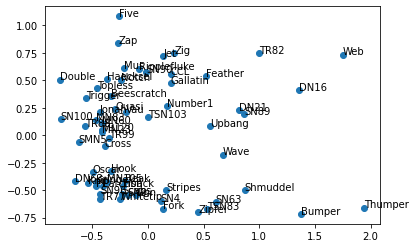

In [10]:
pca = PCA(n_components=2)
H_2dim = pca.fit_transform(H_1)
plt.scatter(H_2dim[:,0], H_2dim[:,1])
for idx, node in enumerate(list(node_to_idx.keys())):
    plt.text(H_2dim[idx,0], H_2dim[idx, 1], node)
plt.show()

待解决的问题：
1. G可视化的时候出来的图像每次都是不一样的
2. PCA降维可视化的结果每次也是不一样的